# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_06_001
## Морфологічні перетворення. Операції над множинами

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 10

In [2]:
# ВИзначення та друк параметрів зображення
def image_data (image):
    rank     = len(image.shape)
    rows_num = image.shape[0] ## кількість рядків
    clms_num = image.shape[1] ## кількість колонок
    chen_num = 1
    if rank == 3: 
        chen_num = image.shape[2] ## кількість каналів
    print('Опис зображення ')
    print('IMAGE RANK',  rank)
    print('IMAGE SHAPE', image.shape)
    print('DATA Type',   image.dtype)
    return rows_num,clms_num, chen_num

In [3]:
# Відобрадження обраного зображення
def image1_view (image, image_name):
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.title(image_name)
    plt.imshow(image)
    plt.show()
    return 

In [4]:
# Відобрадження двох зображень длчя порівняння
def image2_view (image1, image2, image1_name, image2_name):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].set_title(image1_name)
    ax[0].imshow(image1)
    ax[1].set_title(image2_name)
    ax[1].imshow(image2)
    plt.show()
    return

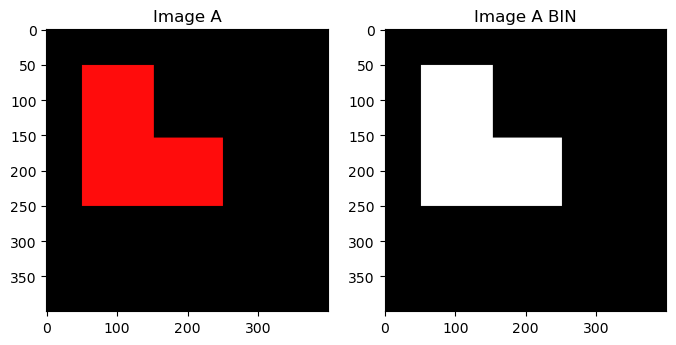

In [5]:
## Завантаження файлу зображення A множина
path = './IMAGES/'
filename1 = 'A_Image.png' 
image_A = io.imread(path+filename1)

rows_num = image_A.shape[0]
clms_num= image_A.shape[1]

# Перетворення до бінарного
bin_image_A = np.full ((rows_num, clms_num, 3), (0, 0, 0) , dtype=np.uint8) 
for i in  range (rows_num):
    for j in  range (clms_num):
        if image_A[i, j, 0] > 126 : bin_image_A [i, j, :] = [255,255,255]

image2_view (image_A, bin_image_A, 'Image A', 'Image A BIN')



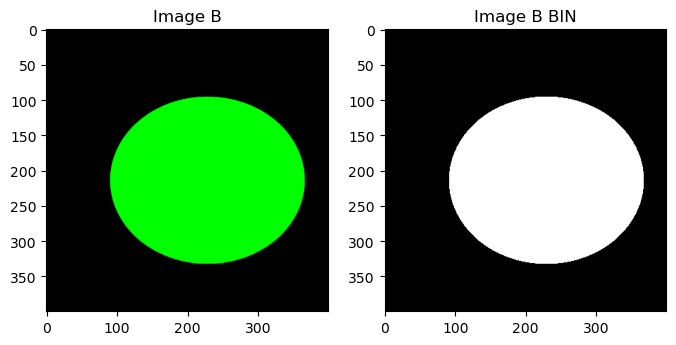

In [6]:
## Завантаження файлу зображення В множина
path = './IMAGES/'
filename1 = 'B_Image.png' 
image_B = io.imread(path+filename1)

#  Перебачаємо що розміри зображень A та B ОДНАКОВІ!

# Перетворення до бінарного
bin_image_B = np.full ((rows_num, clms_num, 3), (0, 0, 0) , dtype=np.uint8) 
for i in  range (rows_num):
    for j in  range (clms_num):
        if image_B[i, j, 1] > 126 : bin_image_B [i, j, :] = [255,255,255]

image2_view (image_B, bin_image_B, 'Image B', 'Image B BIN')


#### Множинне доповнення (NOT)

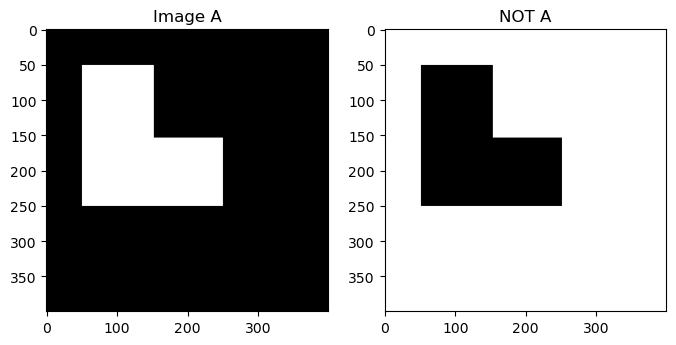

In [7]:
A_dop = np.full ((rows_num, clms_num, 3), (0, 0, 0) , dtype=np.uint8) 
for i in  range (rows_num):
    for j in  range (clms_num):
        if bin_image_A[i, j, 0] < 126 : 
            A_dop [i,j, :] = [255,255,255]
            
image2_view (bin_image_A, A_dop, 'Image A', 'NOT A')


#### Множинна операція об'єднання OR

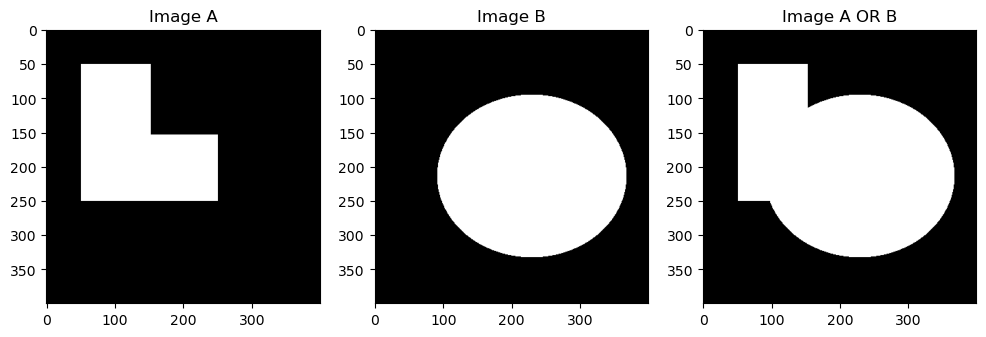

In [8]:
A_or_B = np.full ((rows_num, clms_num, 3), (0, 0, 0) , dtype=np.uint8) 
for i in  range (rows_num):
    for j in  range (clms_num):
        if bin_image_A[i, j, 0] > 126 or bin_image_B [i, j, 0] > 126: 
            A_or_B [i,j, :] = [255,255,255]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()
ax[0].imshow(bin_image_A)
ax[0].set_title("Image A")
ax[1].imshow(bin_image_B)
ax[1].set_title("Image B")
ax[2].imshow(A_or_B)
ax[2].set_title("Image A OR B")
plt.show()            

#### Множинна операція перетину AND

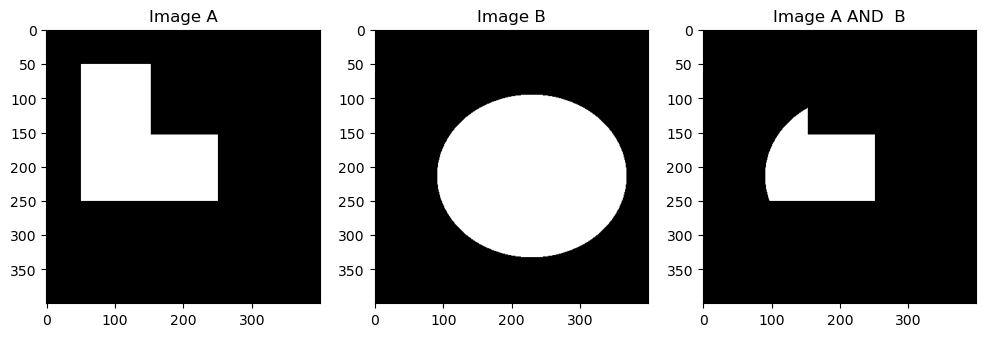

In [9]:
A_and_B = np.full ((rows_num, clms_num, 3), (0, 0, 0) , dtype=np.uint8) 
for i in  range (rows_num):
    for j in  range (clms_num):
        if bin_image_A[i, j, 0] > 126 and bin_image_B [i, j, 0] > 126: 
            A_and_B [i,j, :] = [255,255,255]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()
ax[0].imshow(bin_image_A)
ax[0].set_title("Image A")
ax[1].imshow(bin_image_B)
ax[1].set_title("Image B")
ax[2].imshow(A_and_B)
ax[2].set_title("Image A AND  B")

plt.show()            



#### Множинна операція різниця (A-B)

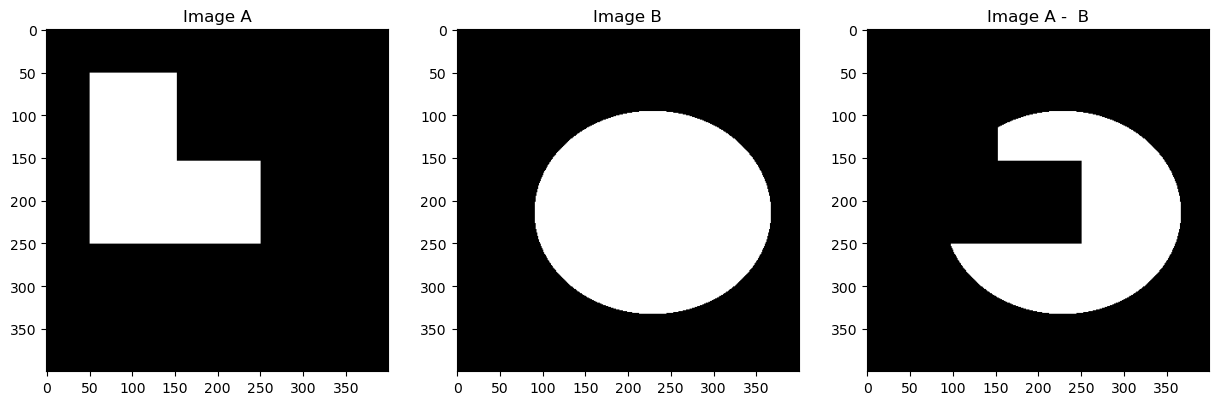

In [10]:
A_min_B = np.full ((rows_num, clms_num, 3), (0, 0, 0) , dtype=np.uint8) 
for i in  range (rows_num):
    for j in  range (clms_num):
        if (bin_image_B[i, j, 0] > 126 and bin_image_A [i, j, 0] < 126): 
            A_min_B [i,j, :] = [255,255,255]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()
ax[0].imshow(bin_image_A)
ax[0].set_title("Image A")
ax[1].imshow(bin_image_B)
ax[1].set_title("Image B")
ax[2].imshow(A_min_B)
ax[2].set_title("Image A -  B")

plt.show()            

#### Множинна операція симетрична різниця XOR

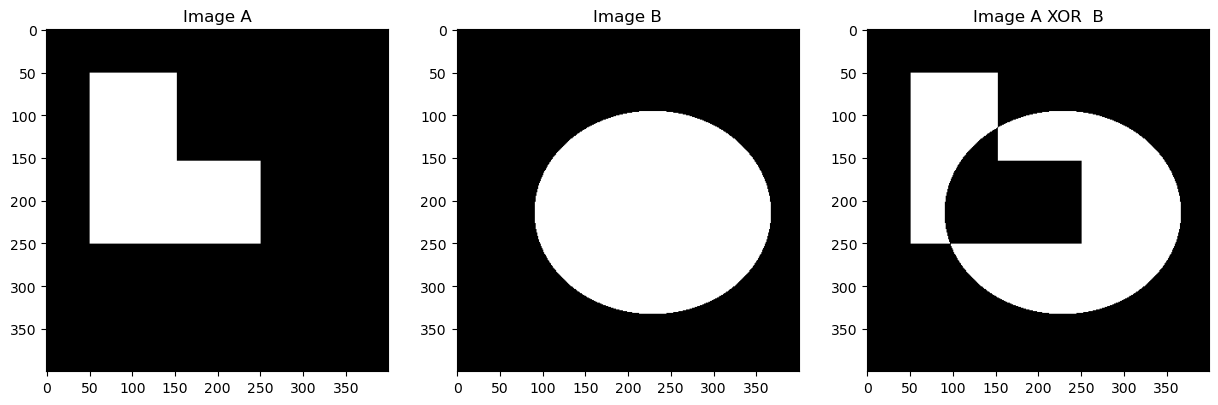

In [11]:
A_xor_B = np.full ((rows_num, clms_num, 3), (0, 0, 0) , dtype=np.uint8) 
for i in  range (rows_num):
    for j in  range (clms_num):
        if (bin_image_A[i, j, 0] > 126 and bin_image_B [i, j, 0] < 126) or (bin_image_A[i, j, 0] < 126 and bin_image_B [i, j, 0] > 126): 
            A_xor_B [i,j, :] = [255,255,255]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()
ax[0].imshow(bin_image_A)
ax[0].set_title("Image A")
ax[1].imshow(bin_image_B)
ax[1].set_title("Image B")
ax[2].imshow(A_xor_B)
ax[2].set_title("Image A XOR  B")

plt.show()            